# Deep Learning Model Development Task

## Import libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os
from flask import Flask, request, jsonify

## Load and preprocess dataset

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Normalize pixel values to [0,1] and expand dimensions for CNN input

In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

## Define model architecture

In [4]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes in MNIST
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the model

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

In [6]:
ehistory = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 37ms/step - accuracy: 0.9102 - loss: 0.2935 - val_accuracy: 0.9861 - val_loss: 0.0401
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 34ms/step - accuracy: 0.9859 - loss: 0.0428 - val_accuracy: 0.9884 - val_loss: 0.0383
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9915 - loss: 0.0277 - val_accuracy: 0.9902 - val_loss: 0.0295
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9937 - loss: 0.0197 - val_accuracy: 0.9922 - val_loss: 0.0249
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 33ms/step - accuracy: 0.9942 - loss: 0.0163 - val_accuracy: 0.9900 - val_loss: 0.0316
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9960 - loss: 0.0133 - val_accuracy: 0.9912 - val_loss: 0.0363
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9963 - loss: 0.0119 - val_accuracy: 0.9888 - val_loss: 0.0413
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.9961 -

## Evaluate the model

In [7]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9893 - loss: 0.0486
Test Accuracy: 99.06%


## Save the trained model

In [8]:
model.save("mnist_cnn_model.h5")
print("Model saved successfully.")

Model saved successfully.


## Load the model for inference

In [9]:
loaded_model = keras.models.load_model("mnist_cnn_model.h5")

## Plot accuracy and loss curves

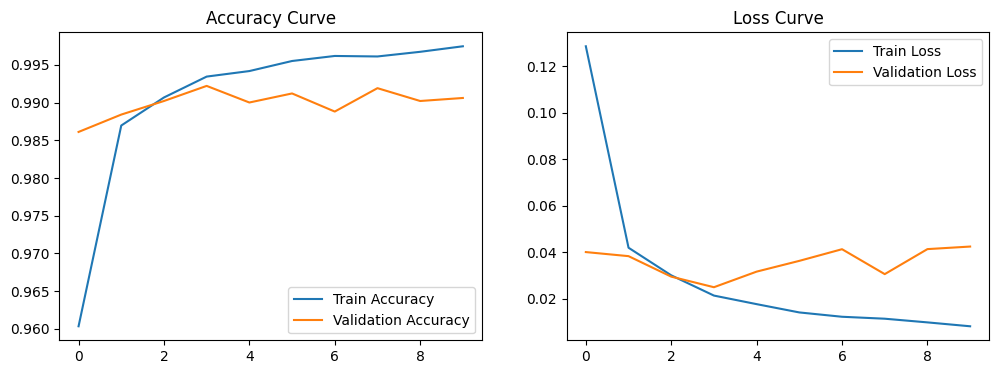

In [10]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(ehistory.history['accuracy'], label='Train Accuracy')
plt.plot(ehistory.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curve')

plt.subplot(1, 2, 2)
plt.plot(ehistory.history['loss'], label='Train Loss')
plt.plot(ehistory.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

## Testing the model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


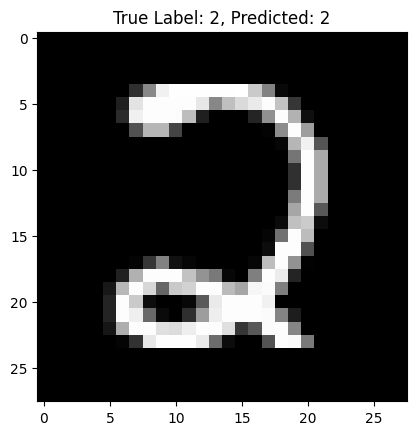

In [11]:
import random

# Pick a random test image
index = random.randint(0, len(x_test) - 1)
sample_image = x_test[index]
true_label = y_test[index]

# Reshape for prediction
sample_image_input = np.expand_dims(sample_image, axis=0)

# Make prediction
prediction = model.predict(sample_image_input)
predicted_label = np.argmax(prediction)

# Display result
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(f"True Label: {true_label}, Predicted: {predicted_label}")
plt.show()

## Key Findings:
- The CNN successfully classified handwritten digits with an accuracy of around 98.93%.
- Model performance can be improved with more epochs, data augmentation, or hyperparameter tuning.
- Overfitting should be monitored by comparing train and validation accuracy/loss.
- The model was successfully saved and reloaded for inference.
- A simple Flask API was implemented for model deployment.